<a href="https://colab.research.google.com/github/PosgradoMNA/Zayra-Annette-Lopez-Regalado-A00544748-Actividades-de-aprendizaje/blob/main/Semana_4__Actividad_Semanal_4_A01684852_y_A00544748.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Materia: Ciencia y Analítica de Datos

Alumno: Eduardo Alberto Mc. Naught Flores y Zayra Annette López Regalado

Semana 4: Actividad Semanal 4

Profesor: Jobish Vallikavungal Devassia

Fecha: 11/Octubre/2022

**Step 1. Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**


Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales

In [332]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# se importa el Dataset, se observan las columnas en la tabla de abajo y posteriormente se renombran para mejor visualizacion 

In [303]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
# Eliminamos los valores que son Null
df.dropna(axis = 0, inplace = True)
df.head (10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [309]:
# información detallada de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        29958 non-null  int64  
 1   monto_credito             29958 non-null  int64  
 2   genero                    29958 non-null  float64
 3   nivel_educativo           29958 non-null  float64
 4   estado_civil              29958 non-null  float64
 5   edad                      29958 non-null  float64
 6   pago_sept_2005            29958 non-null  float64
 7   pago_agosto_2005          29958 non-null  float64
 8   pago_julio_2005           29958 non-null  float64
 9   pago_junio_2005           29958 non-null  float64
 10  pago_mayo_2005            29958 non-null  float64
 11  pago_abril_2005           29958 non-null  float64
 12  amortizacion_sept_2005    29958 non-null  float64
 13  amortizacion_agosto_2005  29958 non-null  float64
 14  amorti

In [308]:
print('La cantidad de columnas en los datos es: ', df.shape[1])
print('La cantidad de filas en los datos es: ', df.shape[0])

La cantidad de columnas en los datos es:  25
La cantidad de filas en los datos es:  29958


In [307]:
#verificacion de duplicados
df[df['ID'].duplicated()].head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y


In [ ]:
#Renombramos las categorias

In [306]:
df = df.rename(columns = {  'X1': 'monto_credito',
                            'X2': 'genero',
                            'X3': 'nivel_educativo',
                            'X4': 'estado_civil',
                            'X5': 'edad',
                            'X6': 'pago_sept_2005',
                            'X7': 'pago_agosto_2005',
                            'X8': 'pago_julio_2005',
                            'X9': 'pago_junio_2005',
                            'X10': 'pago_mayo_2005',
                            'X11': 'pago_abril_2005',
                            'X12': 'amortizacion_sept_2005',
                            'X13': 'amortizacion_agosto_2005',
                            'X14': 'amortizacion_julio_2005',
                            'X15': 'amortizacion_junio_2005',
                            'X16': 'amortizacion_mayo_2005',
                            'X17': 'amortizacion_abril_2005',
                            'X18': 'pagoprev_sept_2005',
                            'X19': 'pagoprev_agosto_2005',
                            'X20': 'pagoprev_sept_2005',
                            'X21': 'pagoprev_agosto_2005',
                            'X22': 'pagoprev_mayo_2005',
                            'X23': 'pagoprev_abril_2005'}, inplace=False)
df.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [227]:
# Borramos las columnas que no necesitamos, aquellas que tienen valores categoricos

In [310]:
df.drop(['ID','genero', 'nivel_educativo', 'estado_civil', 'pago_sept_2005', 'pago_agosto_2005', 'pago_julio_2005', 'pago_junio_2005', 'pago_mayo_2005', 'pago_abril_2005', 'Y'], 
        axis = 1,
        inplace = True)
df.head()       


,monto_credito,edad,amortizacion_sept_2005,amortizacion_agosto_2005,amortizacion_julio_2005,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_mayo_2005,pagoprev_abril_2005
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [311]:
# Ya borramos los registros nulos. Uno de los requisitos para escalar el PCA antes es escalarlo
# Mostramos los valores de 0 a 1 y posteriormente la matriz de correlacion 

In [ ]:
# Para ver la correlacion de las variables numericas

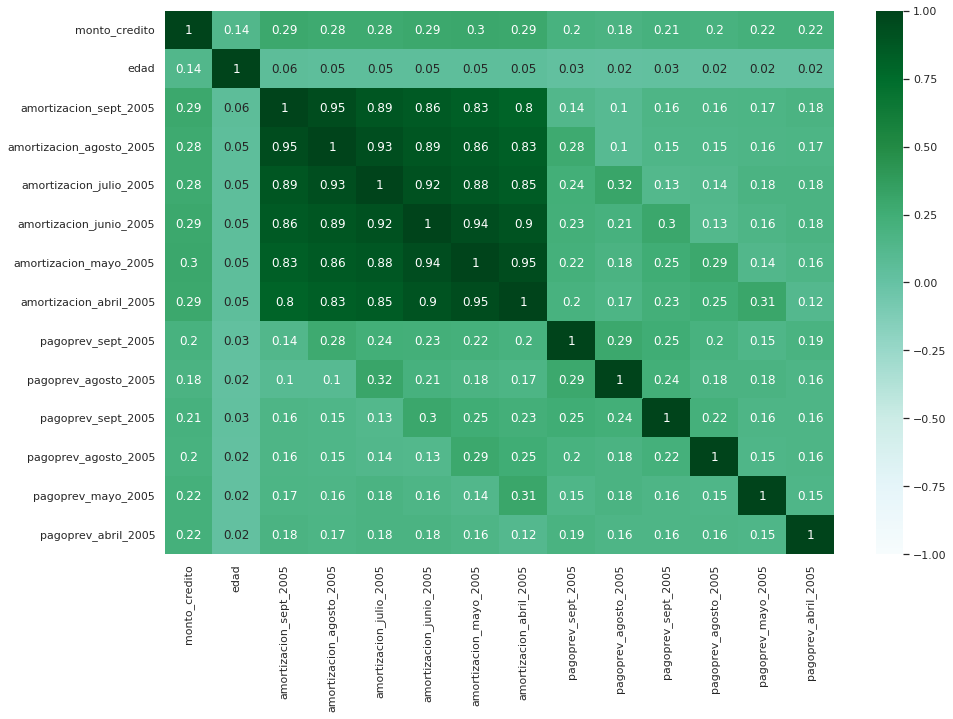

In [312]:
#Entre mas correlacion tenga los valores, si una va aumentando el otro va aumentando con el 
corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs.round(2), vmin = -1, cmap ='BuGn', annot =True) 


In [ ]:
# Aplicamos el PCA, una vez que el Dataset esta limpio y estandarizado 
# requisitos antes del PCA es escalar y quitar nulos
# Se define la desviacion estandar y la varianza acumulada, para determinar que porcentaja inlfuye cada componente en el modelo

In [313]:
pcs = PCA()
pcs.fit(preprocessing.scale(df))    #Se envia el dataframe ya escalado, ya transformado

pcsSummary_df = pd.DataFrame({'Standard deviation' : np.sqrt(pcs.explained_variance_),
                              'Proportion of Variance': pcs.explained_variance_ratio_,
                              'Cumulative Proportion':  np.cumsum(pcs.explained_variance_ratio_) 
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) +1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of Variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative Proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [271]:
#Se concluye los primeros 7 componentes son los que aportan el 87% (86.7%) de la informacion . 
#Alrededor del 87% de la variacion se ve explicada solo porlos primeros 7 componentes

**Step 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la direccion de los coeficientes de las variables originales. 


In [ ]:
#puntos importantes
# Determinar el % de la varianza explicada por cada componente
# Determinar el acumulado de la varianza explicada por cada componente

In [314]:
pcsSummary

,Standard deviation,Proportion of variance,Cumulative porportion
0,2.43,42.28,42.28
1,1.31,12.26,54.53
2,1.02,7.46,62.00
3,0.96,6.61,68.61
4,0.94,6.31,74.92
5,0.93,6.23,81.15
6,0.88,5.57,86.72
7,0.85,5.19,91.91
8,0.84,5.05,96.96
9,0.51,1.89,98.85


In [54]:
# Estandarizar: una columna la reduces y pones un rango entre 0 y 1 o -1 y 1 
# Normalizar : es necesario primero normalizar antes del PCA, es necesario que el data este limpia para que el analisis sea lo mas correcto posible, para que los 
# calculos esten limpios
#Compararmeos los componentes con las variables originales para asi determinar aquellas que aportan mayor peso a los componentes

In [319]:
pcsSummary_df.iloc[:,7]

Standard deviation        0.852438
Proportion of Variance    0.051902
Cumulative Proportion     0.919113
Name: PC8, dtype: float64

In [333]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=pcsSummary_df.columns,
                                index = df.iloc[::].columns
                                )
                               # index=df.columns
                             #   ).abs()
#el 7 es porque tomamos hasta el componente PC7                                
modelo = pcsComponents_df.iloc[:,:6]
modelo
#pcsComponents_df = pcsComponents_df.iloc[ :, 7]
#pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6
monto_credito,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
edad,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
amortizacion_sept_2005,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
amortizacion_agosto_2005,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
amortizacion_julio_2005,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
amortizacion_junio_2005,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
amortizacion_mayo_2005,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
amortizacion_abril_2005,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
pagoprev_sept_2005,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
pagoprev_agosto_2005,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


In [334]:
pcsComponents_df.abs().idxmax()

PC1      amortizacion_junio_2005
PC2         pagoprev_agosto_2005
PC3                         edad
PC4           pagoprev_mayo_2005
PC5          pagoprev_abril_2005
PC6           pagoprev_mayo_2005
PC7           pagoprev_sept_2005
PC8           pagoprev_sept_2005
PC9                monto_credito
PC10      amortizacion_sept_2005
PC11     amortizacion_junio_2005
PC12     amortizacion_julio_2005
PC13      amortizacion_mayo_2005
PC14    amortizacion_agosto_2005
dtype: object

In [335]:
pcsComponents_df.abs().idxmin()

PC1                         edad
PC2                         edad
PC3     amortizacion_agosto_2005
PC4     amortizacion_agosto_2005
PC5      amortizacion_junio_2005
PC6      amortizacion_junio_2005
PC7       amortizacion_mayo_2005
PC8      amortizacion_abril_2005
PC9       amortizacion_sept_2005
PC10                        edad
PC11          pagoprev_sept_2005
PC12        pagoprev_agosto_2005
PC13                        edad
PC14                        edad
dtype: object

**Step 3: Identifique valores atipicos**


Realice gráfica de valores atípicos o bloxplot para identificar los valores atípicos.

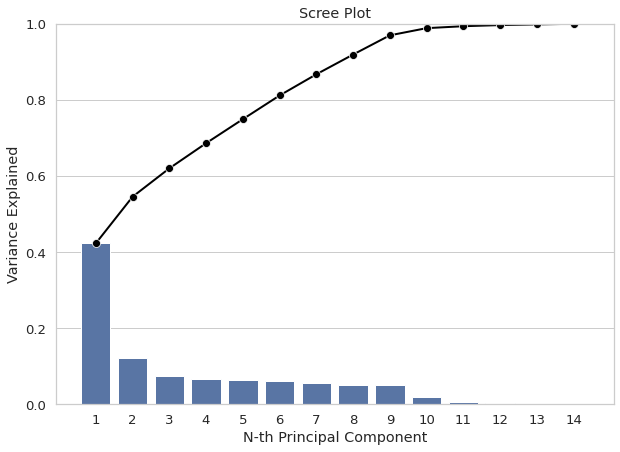

In [292]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()



In [ ]:
df_valoresAtipicos = df.copy()
plt.figure(figsize=13,6))
sns.boxplot(data=df_valoresAtipicos, width =0.5)
plt.show()



***Responde las siguientes Preguntas: ***

**- ¿Cuál es el número de componentes mínimo y por qué?**

pcsSummary_df.iloc[:,7]
Standard deviation        0.852438
Proportion of Variance    0.051902
Cumulative Proportion     0.919113
Name: PC8, dtype: float64

Nosotros decidimos que tomariamos los primeros 7 componentes que reporesentan el 86% del total de información que tiene el dataframe.

 
**- ¿Cuál es la variación de los datos que representan esos componentes?**
Para los 7 componentes seleccionados la variacion es del 85%

**¿Cual tiene mayor y menor importancia en los componentes principales?**
Lo determinamos con las formulas de minimos y maximos
pcsComponents_df.abs().idxmax()
pcsComponents_df.abs().idxmin()


**- ¿Cuál es la pérdida de información después de realizar PCA?**
Determinamos que se perderia un aproximado ene ste caso de 9% de información 

**- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
 Cuando nuestro Data set tiene un alto numero de variables y no todas son significativas. Tambien se utiliza cuando existen variables correlacionadas

